# Basic diagnostics and enrgy time series 

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import dask
import dask.distributed
from xgcm import Grid
%matplotlib inline

In [138]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/SWM_Two_Layer/Ridge_Width/"
ds_stat1 = xr.open_dataset(ppdir+"H_400_sigma_400/ocean.stats.nc")
print(ds_stat1)

<xarray.Dataset>
Dimensions:        (Interface: 3, Layer: 2, Time: 1096)
Coordinates:
  * Layer          (Layer) float64 1.027e+03 1.028e+03
  * Interface      (Interface) float64 1.027e+03 1.028e+03 1.028e+03
  * Time           (Time) timedelta64[ns] 0 days 10 days ... 10950 days
Data variables:
    Ntrunc         (Time) float64 ...
    En             (Time) float64 ...
    APE            (Time, Interface) float64 ...
    KE             (Time, Layer) float64 ...
    H0             (Time, Interface) float64 ...
    Mass_lay       (Time, Layer) float64 ...
    Mass           (Time) float64 ...
    Mass_chg       (Time) float64 ...
    Mass_anom      (Time) float64 ...
    max_CFL_trans  (Time) float64 ...
    max_CFL_lin    (Time) float64 ...
Attributes:
    filename:  ./ocean.stats.nc


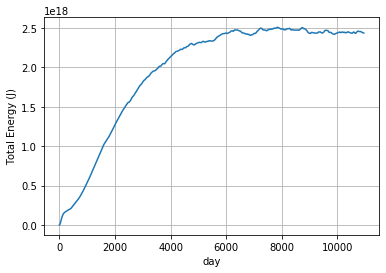

In [139]:
plt.plot(ds_stat1.Time/(1e9*3600*24), ds_stat1.En)
plt.xlabel('day')
plt.ylabel('Total Energy (J)')
plt.grid()

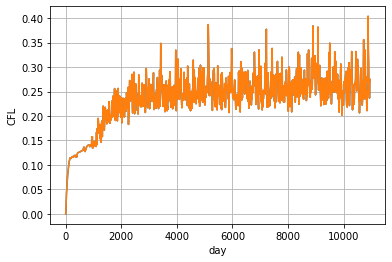

In [140]:
plt.plot(ds_stat1.Time/(1e9*3600*24), ds_stat1.max_CFL_lin)
plt.plot(ds_stat1.Time/(1e9*3600*24), ds_stat1.max_CFL_trans)
plt.xlabel('day')
plt.ylabel('CFL')
plt.grid()

In [6]:
#ds1 = xr.open_mfdataset(ppdir+"H_400_sigma_400/prog*.nc", concat_dim="time", combine="nested",
#                        data_vars='minimal', coords='minimal', compat='override')
#print(ds1)

In [141]:
ds1 = xr.open_dataset(ppdir+"H_400_sigma_400/prog__0021_001.nc")
print(ds1)

<xarray.Dataset>
Dimensions:  (Time: 730, xh: 800, xq: 800, yh: 400, yq: 400, zi: 3, zl: 2)
Coordinates:
  * xq       (xq) float64 4.0 8.0 12.0 16.0 ... 3.192e+03 3.196e+03 3.2e+03
  * yh       (yh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * zl       (zl) float64 1.027e+03 1.028e+03
  * Time     (Time) object 0021-01-01 00:00:00 ... 0030-12-25 00:00:00
  * xh       (xh) float64 2.0 6.0 10.0 14.0 ... 3.19e+03 3.194e+03 3.198e+03
  * yq       (yq) float64 4.0 8.0 12.0 16.0 ... 1.592e+03 1.596e+03 1.6e+03
  * zi       (zi) float64 1.027e+03 1.028e+03 1.028e+03
Data variables:
    u        (Time, zl, yh, xq) float32 ...
    v        (Time, zl, yq, xh) float32 ...
    h        (Time, zl, yh, xh) float64 ...
    e        (Time, zi, yh, xh) float32 ...
Attributes:
    filename:   prog__0021_001.nc
    title:      MOM Two-Layer Experiment
    grid_type:  regular
    grid_tile:  N/A


In [31]:
ds1.Time

<xarray.DataArray 'Time' (Time: 730)>
array([cftime.DatetimeJulian(21, 1, 1, 0, 0, 0, 0, 2, 1),
       cftime.DatetimeJulian(21, 1, 6, 0, 0, 0, 0, 0, 6),
       cftime.DatetimeJulian(21, 1, 11, 0, 0, 0, 0, 5, 11), ...,
       cftime.DatetimeJulian(30, 12, 15, 0, 0, 0, 0, 4, 349),
       cftime.DatetimeJulian(30, 12, 20, 0, 0, 0, 0, 2, 354),
       cftime.DatetimeJulian(30, 12, 25, 0, 0, 0, 0, 0, 359)], dtype=object)
Coordinates:
  * Time     (Time) object 0021-01-01 00:00:00 ... 0030-12-25 00:00:00
Attributes:
    long_name:       Time
    cartesian_axis:  T
    calendar_type:   JULIAN

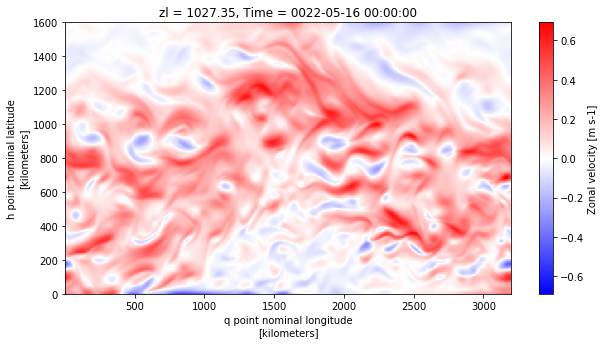

In [18]:
u1 = ds1.u.isel(Time = 100, zl = 0)
u1.plot(figsize=[10,5], cmap='bwr')

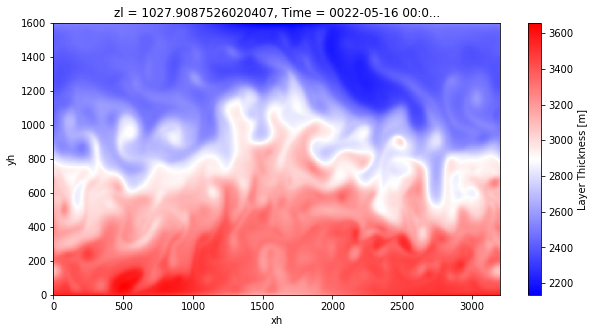

In [98]:
eta = ds1.h.isel(Time = 100, zl = 1)
eta.plot(figsize=[10,5], cmap='bwr')

In [142]:
#ds_geo = xr.open_dataset("/home/Hemant.Khatri/Work/MOM6_input/input_H_400_sigma_400.nc")
ds_geo = xr.open_dataset(ppdir+"H_400_sigma_400/ocean_geometry.nc")
ds_tau = xr.open_dataset("/home/Hemant.Khatri/Work/MOM6_input/input_H_400_sigma_400.nc")
ds_geo

<xarray.Dataset>
Dimensions:  (lath: 400, latq: 400, lonh: 800, lonq: 800)
Coordinates:
  * lath     (lath) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * lonh     (lonh) float64 2.0 6.0 10.0 14.0 ... 3.19e+03 3.194e+03 3.198e+03
  * latq     (latq) float64 4.0 8.0 12.0 16.0 ... 1.592e+03 1.596e+03 1.6e+03
  * lonq     (lonq) float64 4.0 8.0 12.0 16.0 ... 3.192e+03 3.196e+03 3.2e+03
Data variables:
    geolatb  (latq, lonq) float64 ...
    geolonb  (latq, lonq) float64 ...
    geolat   (lath, lonh) float64 ...
    geolon   (lath, lonh) float64 ...
    D        (lath, lonh) float64 ...
    f        (latq, lonq) float64 ...
    dxCv     (latq, lonh) float64 ...
    dyCu     (lath, lonq) float64 ...
    dxCu     (lath, lonq) float64 ...
    dyCv     (latq, lonh) float64 ...
    dxT      (lath, lonh) float64 ...
    dyT      (lath, lonh) float64 ...
    dxBu     (latq, lonq) float64 ...
    dyBu     (latq, lonq) float64 ...
    Ah       (lath, lonh) float64 ...
    Aq      

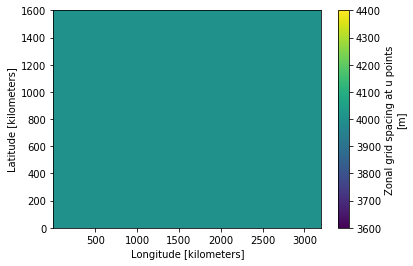

In [102]:
ds_geo.dxCu.plot()

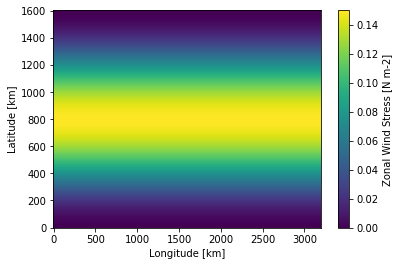

In [143]:
ds_tau.taux.plot()

# Barotropic momentum balance check 

In [145]:
g, cd = (9.81, 0.003)
rho = ds_tau.level.values
print(rho)

[1027.35       1027.90910204]


In [42]:
#ds1['taux'] = ds_geo.taux.rename({'lon':'xh', 'lat':'yh'})

In [146]:
#ds1['taux']=(['yh', 'xh'],  ds_geo['taux'].values)
ds1['taux']= xr.DataArray(ds_tau['taux'].values, coords=[('yh', ds1.yh), ('xh', ds1.xh)], attrs = ds_tau['taux'].attrs)
ds1['D']= xr.DataArray(ds_geo['D'].values, coords=[('yh', ds1.yh), ('xh', ds1.xh)], attrs = ds_geo['D'].attrs)
#ds1 = ds1.drop('lon')

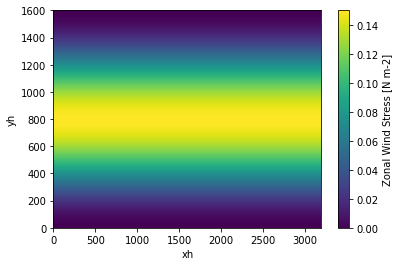

In [147]:
ds1.taux.plot()

In [148]:
ds1

<xarray.Dataset>
Dimensions:  (Time: 730, xh: 800, xq: 800, yh: 400, yq: 400, zi: 3, zl: 2)
Coordinates:
  * xq       (xq) float64 4.0 8.0 12.0 16.0 ... 3.192e+03 3.196e+03 3.2e+03
  * yh       (yh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * zl       (zl) float64 1.027e+03 1.028e+03
  * Time     (Time) object 0021-01-01 00:00:00 ... 0030-12-25 00:00:00
  * xh       (xh) float64 2.0 6.0 10.0 14.0 ... 3.19e+03 3.194e+03 3.198e+03
  * yq       (yq) float64 4.0 8.0 12.0 16.0 ... 1.592e+03 1.596e+03 1.6e+03
  * zi       (zi) float64 1.027e+03 1.028e+03 1.028e+03
Data variables:
    u        (Time, zl, yh, xq) float32 ...
    v        (Time, zl, yq, xh) float32 ...
    h        (Time, zl, yh, xh) float64 ...
    e        (Time, zi, yh, xh) float32 ...
    taux     (yh, xh) float64 0.0 0.0 0.0 0.0 ... 2.25e-33 2.25e-33 2.25e-33
    D        (yh, xh) float64 4e+03 4e+03 4e+03 4e+03 ... 4e+03 4e+03 4e+03
Attributes:
    filename:   prog__0021_001.nc
    title:      MOM Two-L

In [149]:
grid = Grid(ds1, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'} }, periodic=['X'])
grid

<xgcm.Grid>
X Axis (periodic):
  * center   xh --> right
  * right    xq --> center
Y Axis (not periodic):
  * center   yh --> right
  * right    yq --> center

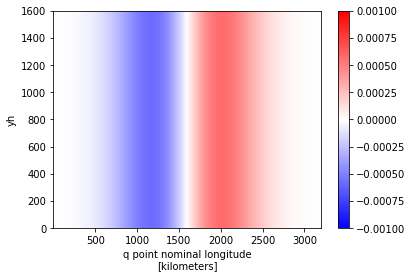

In [111]:
#Topo = grid.diff(ds1.D, 'X', boundary='fill')/4000.
Topo.plot(vmin = -0.001, vmax=0.001, cmap='bwr')

In [150]:
# Wind Stress term
WS = ds1['taux'] * ds1['h'].isel(zl = 0)/ds1['zl'].isel(zl = 0)
WS = WS.mean('Time')

In [151]:
WS

<xarray.DataArray (yh: 400, xh: 800)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.19414218e-06, 4.19352335e-06, 4.19307999e-06, ...,
        4.19581455e-06, 4.19542855e-06, 4.19483559e-06],
       [1.71530583e-05, 1.71487670e-05, 1.71451148e-05, ...,
        1.71653154e-05, 1.71618241e-05, 1.71576204e-05],
       ...,
       [5.35493484e-05, 5.35488159e-05, 5.35482970e-05, ...,
        5.35510465e-05, 5.35504627e-05, 5.35498968e-05],
       [1.33455443e-05, 1.33454873e-05, 1.33454320e-05, ...,
        1.33457282e-05, 1.33456646e-05, 1.33456034e-05],
       [3.21791385e-33, 3.21791882e-33, 3.21792378e-33, ...,
        3.21789890e-33, 3.21790386e-33, 3.21790886e-33]])
Coordinates:
  * yh       (yh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * xh       (xh) float64 2.0 6.0 10.0 14.0 ... 3.19e+03 3.194e+03 3.198e+03
    zl       float64 1.027e+03

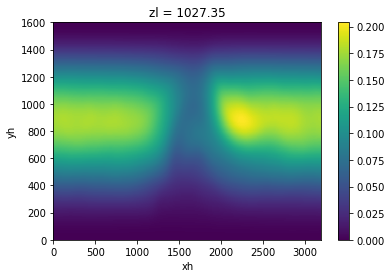

In [152]:
WS.plot()

In [153]:
Topo_x = grid.interp(Topo, 'X', boundary='fill')
Topo_x

<xarray.DataArray (yh: 400, xh: 800)>
array([[-1.47796278e-06, -3.00551395e-06, -3.10620385e-06, ...,
         3.10620385e-06,  3.00551395e-06,  1.47796278e-06],
       [-1.47796278e-06, -3.00551395e-06, -3.10620385e-06, ...,
         3.10620385e-06,  3.00551395e-06,  1.47796278e-06],
       [-1.47796278e-06, -3.00551395e-06, -3.10620385e-06, ...,
         3.10620385e-06,  3.00551395e-06,  1.47796278e-06],
       ...,
       [-1.47796278e-06, -3.00551395e-06, -3.10620385e-06, ...,
         3.10620385e-06,  3.00551395e-06,  1.47796278e-06],
       [-1.47796278e-06, -3.00551395e-06, -3.10620385e-06, ...,
         3.10620385e-06,  3.00551395e-06,  1.47796278e-06],
       [-1.47796278e-06, -3.00551395e-06, -3.10620385e-06, ...,
         3.10620385e-06,  3.00551395e-06,  1.47796278e-06]])
Coordinates:
  * yh       (yh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * xh       (xh) float64 2.0 6.0 10.0 14.0 ... 3.19e+03 3.194e+03 3.198e+03

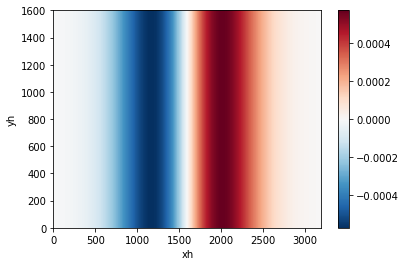

In [154]:
Topo_x.plot()

In [155]:
TFS = - g * (Topo_x * ds1['h']).sum('zl')
TFS = TFS.mean('Time')

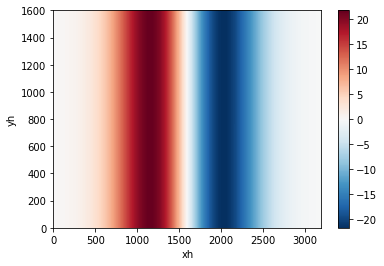

In [156]:
TFS.plot()

In [157]:
TFS1 = - Topo_x * ds1['h'].isel(zl = 1)
TFS1 = TFS1.mean('Time') * g * (rho[1] - rho[0])/rho[0]

In [158]:
print(TFS.mean().values, TFS1.mean().values, WS.mean().values, ds1['taux'].mean().values/rho[0])

2.513835364724173e-05 2.931311348140631e-06 0.07386969473324953 7.282084975908892e-05


In [159]:
u1 = grid.interp(ds1['u'], 'X', boundary='fill')
v1 = grid.interp(ds1['v'], 'Y', boundary='fill')

u_rms = xr.ufuncs.sqrt(xr.ufuncs.square(u1.isel(zl = 1)) + xr.ufuncs.square(v1.isel(zl = 1)))
BD = cd * u1.isel(zl = 1) * u_rms
BD = BD.mean('Time')

/home/Hemant.Khatri/anaconda3/envs/analysis_python3/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [160]:
print(TFS.mean().values, TFS1.mean().values, WS.mean().values, BD.mean().values, ds1['taux'].mean().values/rho[0])

2.513835364724173e-05 2.931311348140631e-06 0.07386969473324953 2.7336217e-05 7.282084975908892e-05


In [161]:
print(ds1['taux'].mean().values/rho[0] - TFS.mean().values - TFS1.mean().values - BD.mean().values)

1.7414968173804968e-05


In [133]:
ds_stat1.close()
ds1.close()
ds_geo.close()

# Ridge: H = 400 m and sigma = 600 m run

In [137]:
ds_stat2 = xr.open_dataset(ppdir+"H_400_sigma_600/ocean.stats.nc")
print(ds_stat2)

<xarray.Dataset>
Dimensions:        (Interface: 3, Layer: 2, Time: 1096)
Coordinates:
  * Layer          (Layer) float64 1.027e+03 1.028e+03
  * Interface      (Interface) float64 1.027e+03 1.028e+03 1.028e+03
  * Time           (Time) timedelta64[ns] 0 days 10 days ... 10950 days
Data variables:
    Ntrunc         (Time) float64 ...
    En             (Time) float64 ...
    APE            (Time, Interface) float64 ...
    KE             (Time, Layer) float64 ...
    H0             (Time, Interface) float64 ...
    Mass_lay       (Time, Layer) float64 ...
    Mass           (Time) float64 ...
    Mass_chg       (Time) float64 ...
    Mass_anom      (Time) float64 ...
    max_CFL_trans  (Time) float64 ...
    max_CFL_lin    (Time) float64 ...
Attributes:
    filename:  ./ocean.stats.nc


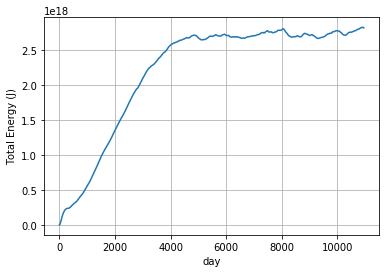

In [12]:
plt.plot(ds_stat2.Time/(1e9*3600*24), ds_stat2.En)
plt.xlabel('day')
plt.ylabel('Total Energy (J)')
plt.grid()

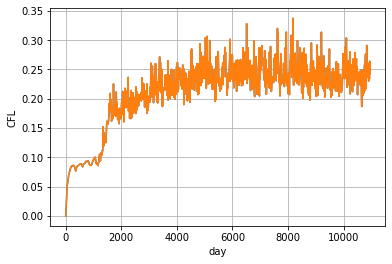

In [14]:
plt.plot(ds_stat2.Time/(1e9*3600*24), ds_stat2.max_CFL_lin)
plt.plot(ds_stat2.Time/(1e9*3600*24), ds_stat2.max_CFL_trans)
plt.xlabel('day')
plt.ylabel('CFL')
plt.grid()

In [15]:
#ds1 = xr.open_mfdataset(ppdir+"H_400_sigma_600/prog*.nc", concat_dim="time", combine="nested",
                        data_vars='minimal', coords='minimal', compat='override')

ds1 = xr.open_dataset(ppdir+"H_400_sigma_400/prog__0021_001.nc")
print(ds1)

<xarray.Dataset>
Dimensions:  (Time: 2190, xh: 800, xq: 800, yh: 400, yq: 400, zi: 3, zl: 2)
Coordinates:
  * zl       (zl) float64 1.027e+03 1.028e+03
  * Time     (Time) object 0001-01-06 00:00:00 ... 0030-12-25 00:00:00
  * yq       (yq) float64 4.0 8.0 12.0 16.0 ... 1.592e+03 1.596e+03 1.6e+03
  * zi       (zi) float64 1.027e+03 1.028e+03 1.028e+03
  * xq       (xq) float64 4.0 8.0 12.0 16.0 ... 3.192e+03 3.196e+03 3.2e+03
  * yh       (yh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * xh       (xh) float64 2.0 6.0 10.0 14.0 ... 3.19e+03 3.194e+03 3.198e+03
Data variables:
    v        (Time, zl, yq, xh) float32 dask.array<chunksize=(2190, 2, 400, 800), meta=np.ndarray>
    u        (Time, zl, yh, xq) float32 dask.array<chunksize=(2190, 2, 400, 800), meta=np.ndarray>
    h        (Time, zl, yh, xh) float64 dask.array<chunksize=(2190, 2, 400, 800), meta=np.ndarray>
    e        (Time, zi, yh, xh) float32 dask.array<chunksize=(2190, 3, 400, 800), meta=np.ndarray>
Att

In [16]:
ds1.Time.values

array([cftime.DatetimeJulian(1, 1, 6, 0, 0, 0, 0, 3, 6),
       cftime.DatetimeJulian(1, 1, 11, 0, 0, 0, 0, 1, 11),
       cftime.DatetimeJulian(1, 1, 16, 0, 0, 0, 0, 6, 16), ...,
       cftime.DatetimeJulian(30, 12, 15, 0, 0, 0, 0, 4, 349),
       cftime.DatetimeJulian(30, 12, 20, 0, 0, 0, 0, 2, 354),
       cftime.DatetimeJulian(30, 12, 25, 0, 0, 0, 0, 0, 359)],
      dtype=object)

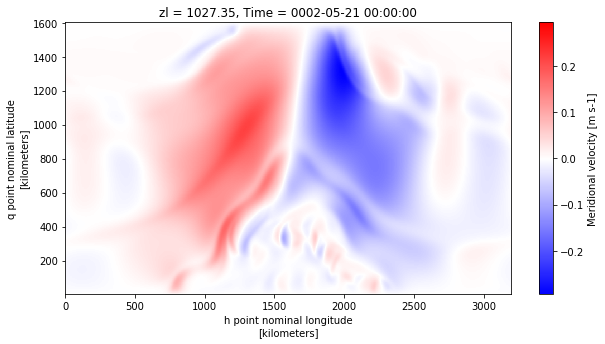

In [20]:
v1 = ds1.v.isel(Time = 100, zl = 0)
v1.plot(figsize=[10,5], cmap='bwr')

In [21]:
ds_stat2.close()
ds1.close()

# h0 = 1000 m and ridges = 5 

In [2]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/SWM_Two_Layer/sin_ridge/"
ds_stat1 = xr.open_dataset(ppdir+"H_1000_n_5/ocean.stats.nc")
print(ds_stat1)

<xarray.Dataset>
Dimensions:        (Interface: 3, Layer: 2, Time: 1826)
Coordinates:
  * Layer          (Layer) float64 1.027e+03 1.028e+03
  * Interface      (Interface) float64 1.027e+03 1.028e+03 1.028e+03
  * Time           (Time) timedelta64[ns] 0 days 10 days ... 18250 days
Data variables:
    Ntrunc         (Time) float64 ...
    En             (Time) float64 ...
    APE            (Time, Interface) float64 ...
    KE             (Time, Layer) float64 ...
    H0             (Time, Interface) float64 ...
    Mass_lay       (Time, Layer) float64 ...
    Mass           (Time) float64 ...
    Mass_chg       (Time) float64 ...
    Mass_anom      (Time) float64 ...
    max_CFL_trans  (Time) float64 ...
    max_CFL_lin    (Time) float64 ...
Attributes:
    filename:  ./ocean.stats.nc


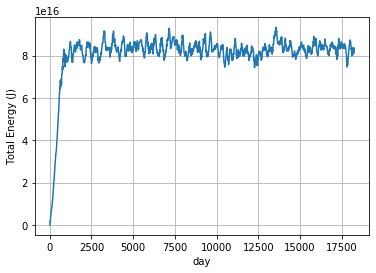

In [7]:
plt.plot(ds_stat1.Time/(1e9*3600*24), ds_stat1.En)
plt.xlabel('day')
plt.ylabel('Total Energy (J)')
plt.grid()

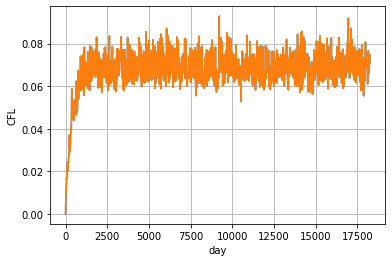

In [9]:
plt.plot(ds_stat1.Time/(1e9*3600*24), ds_stat1.max_CFL_lin)
plt.plot(ds_stat1.Time/(1e9*3600*24), ds_stat1.max_CFL_trans)
plt.xlabel('day')
plt.ylabel('CFL')
plt.grid()

In [3]:
ds1 = xr.open_dataset(ppdir+"H_1000_n_5/prog.nc")
print(ds1)

<xarray.Dataset>
Dimensions:  (Time: 1825, xh: 400, xq: 400, yh: 200, yq: 200, zl: 2)
Coordinates:
  * xq       (xq) float64 4.0 8.0 12.0 16.0 ... 1.592e+03 1.596e+03 1.6e+03
  * yh       (yh) float64 2.0 6.0 10.0 14.0 18.0 ... 786.0 790.0 794.0 798.0
  * zl       (zl) float64 1.027e+03 1.028e+03
  * Time     (Time) object 0001-01-11 00:00:00 ... 0050-12-20 00:00:00
  * xh       (xh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * yq       (yq) float64 4.0 8.0 12.0 16.0 20.0 ... 788.0 792.0 796.0 800.0
Data variables:
    u        (Time, zl, yh, xq) float32 ...
    v        (Time, zl, yq, xh) float32 ...
    h        (Time, zl, yh, xh) float64 ...
Attributes:
    filename:   prog.nc
    title:      MOM Two-Layer Experiment
    grid_type:  regular
    grid_tile:  N/A


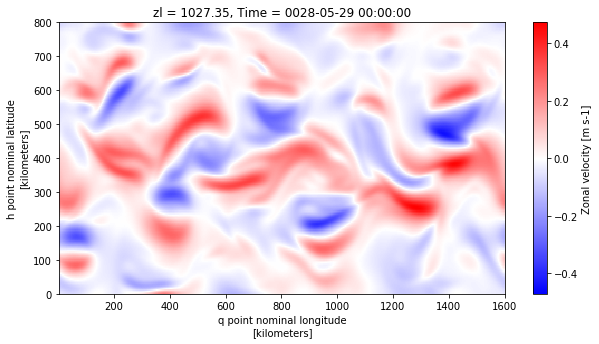

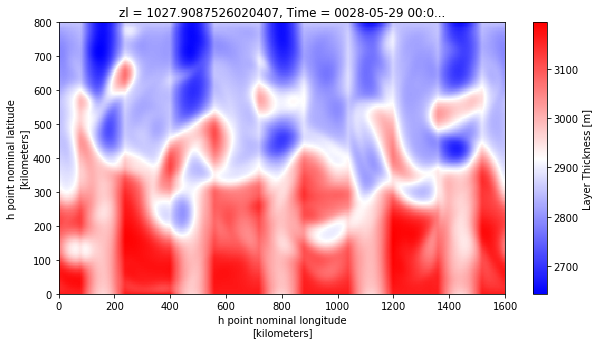

In [11]:
u1 = ds1.u.isel(Time = 1000, zl = 0)
u1.plot(figsize=[10,5], cmap='bwr')

eta = ds1.h.isel(Time = 1000, zl = 1)
eta.plot(figsize=[10,5], cmap='bwr')

In [4]:
ds_geo = xr.open_dataset(ppdir+"H_1000_n_5/ocean_geometry.nc")
ds_tau = xr.open_dataset(ppdir+"H_1000_n_5/input.nc")
ds_geo

<xarray.Dataset>
Dimensions:  (lath: 200, latq: 200, lonh: 400, lonq: 400)
Coordinates:
  * lath     (lath) float64 2.0 6.0 10.0 14.0 18.0 ... 786.0 790.0 794.0 798.0
  * lonh     (lonh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * latq     (latq) float64 4.0 8.0 12.0 16.0 20.0 ... 788.0 792.0 796.0 800.0
  * lonq     (lonq) float64 4.0 8.0 12.0 16.0 ... 1.592e+03 1.596e+03 1.6e+03
Data variables:
    geolatb  (latq, lonq) float64 ...
    geolonb  (latq, lonq) float64 ...
    geolat   (lath, lonh) float64 ...
    geolon   (lath, lonh) float64 ...
    D        (lath, lonh) float64 ...
    f        (latq, lonq) float64 ...
    dxCv     (latq, lonh) float64 ...
    dyCu     (lath, lonq) float64 ...
    dxCu     (lath, lonq) float64 ...
    dyCv     (latq, lonh) float64 ...
    dxT      (lath, lonh) float64 ...
    dyT      (lath, lonh) float64 ...
    dxBu     (latq, lonq) float64 ...
    dyBu     (latq, lonq) float64 ...
    Ah       (lath, lonh) float64 ...
    Aq     

In [5]:
ds1['taux']= xr.DataArray(ds_tau['taux'].values, coords=[('yh', ds1.yh), ('xh', ds1.xh)], attrs = ds_tau['taux'].attrs)
ds1['D']= xr.DataArray(ds_geo['D'].values, coords=[('yh', ds1.yh), ('xh', ds1.xh)], attrs = ds_geo['D'].attrs)

In [6]:
ds1

<xarray.Dataset>
Dimensions:  (Time: 1825, xh: 400, xq: 400, yh: 200, yq: 200, zl: 2)
Coordinates:
  * xq       (xq) float64 4.0 8.0 12.0 16.0 ... 1.592e+03 1.596e+03 1.6e+03
  * yh       (yh) float64 2.0 6.0 10.0 14.0 18.0 ... 786.0 790.0 794.0 798.0
  * zl       (zl) float64 1.027e+03 1.028e+03
  * Time     (Time) object 0001-01-11 00:00:00 ... 0050-12-20 00:00:00
  * xh       (xh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * yq       (yq) float64 4.0 8.0 12.0 16.0 20.0 ... 788.0 792.0 796.0 800.0
Data variables:
    u        (Time, zl, yh, xq) float32 ...
    v        (Time, zl, yq, xh) float32 ...
    h        (Time, zl, yh, xh) float64 ...
    taux     (yh, xh) float64 9.253e-06 9.253e-06 ... 9.253e-06 9.253e-06
    D        (yh, xh) float64 4e+03 4e+03 4e+03 4e+03 ... 4e+03 4e+03 4e+03
Attributes:
    filename:   prog.nc
    title:      MOM Two-Layer Experiment
    grid_type:  regular
    grid_tile:  N/A

In [7]:
grid = Grid(ds1, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'} }, periodic=['X'])
grid

<xgcm.Grid>
X Axis (periodic):
  * center   xh --> right
  * right    xq --> center
Y Axis (not periodic):
  * center   yh --> right
  * right    yq --> center

In [23]:
g = 9.8
cd = 0.003
rho = ds_stat1.Layer.values
print(rho)

[1027.35      1027.9087526]


In [20]:
WS = ds1['taux'].mean()/rho[0]

In [32]:
Topo_x = grid.diff(ds1.D, 'X', boundary='fill')/4000.
Topo_x = - grid.interp(Topo_x, 'X', boundary='fill') # minus sign is required because D is depth

TFS = g * (Topo_x * ds1['h'].isel(Time = slice(500, 1826))).sum('zl')
TFS = TFS.mean('Time')

TFS1 = Topo_x * ds1['h'].isel(zl = 1, Time = slice(500, 1826))
TFS1 = TFS1.mean('Time') * g * (rho[1] - rho[0])/rho[0]

In [8]:
u1 = grid.interp(ds1['u'], 'X', boundary='fill')
v1 = grid.interp(ds1['v'], 'Y', boundary='fill')

#u_rms = xr.ufuncs.sqrt(xr.ufuncs.square(u1.isel(zl = 1)) + xr.ufuncs.square(v1.isel(zl = 1)))
#BD = cd * u1.isel(zl = 1) * u_rms
#BD = BD.isel(Time = slice(500, 1826)).mean('Time')

In [34]:
print(TFS.mean().values, TFS1.mean().values, WS.mean().values, BD.mean().values)

0.00015766067533062086 -8.293552760798363e-05 7.300335815447509e-05 -1.7936396e-06


In [35]:
TFS.mean().values + TFS1.mean().values + BD.mean().values

7.29315080964797e-05

In [22]:
# Mean Transport
um = (u1 * ds1['h']).isel(Time = slice(500, 1826))
um = um.mean('Time')

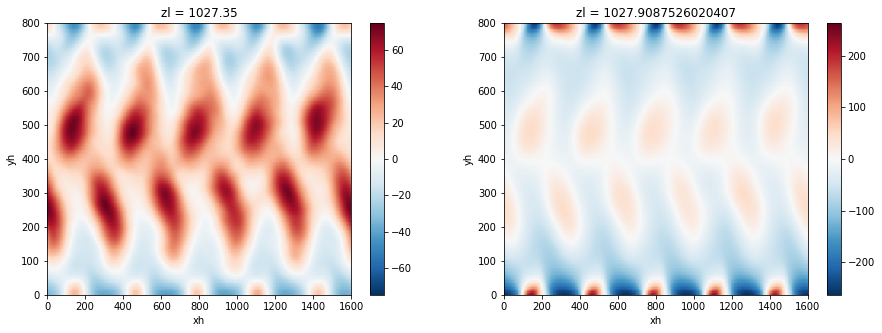

In [30]:
#plt.contourf(um)
#um.shape
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
um.isel(zl=0).plot()

plt.subplot(1,2,2)
um.isel(zl=1).plot()

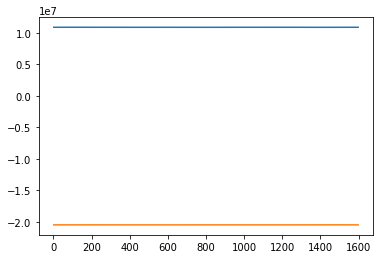

In [31]:
ux = um.sum('yh')*4000. 
plt.plot(ds1.xh, ux.transpose())

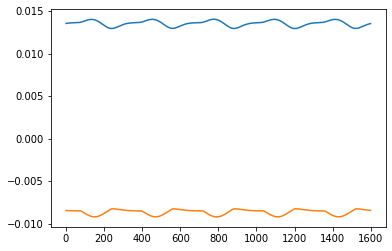

In [34]:
u = u1.isel(Time = slice(500, 1826)).mean(['Time','yh'])
#u = u.mean('yh') 
plt.plot(ds1.xh, u.transpose())

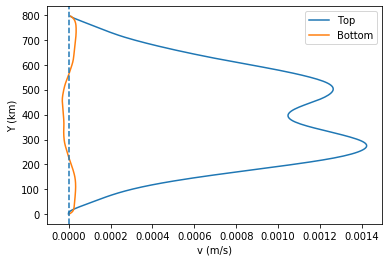

In [42]:
#v = v1.isel(Time = slice(500, 1826)).mean(['Time','xh'])
#u = u.mean('yh') 
plt.plot(v.transpose(), ds1.yh)
plt.axvline(x=0, linestyle='--')
plt.xlabel('v (m/s)')
plt.ylabel('Y (km)')
plt.legend(['Top', 'Bottom'])

In [ ]:
ds_stat1.close()
ds1.close()
ds_geo.close()
ds_tau.close()

# h0 = 1000 m and ridges = 2

In [2]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/SWM_Two_Layer/sin_ridge/"
ds_stat1 = xr.open_dataset(ppdir+"H_1000_n_2/ocean.stats.nc")
print(ds_stat1)

<xarray.Dataset>
Dimensions:        (Interface: 3, Layer: 2, Time: 1826)
Coordinates:
  * Layer          (Layer) float64 1.027e+03 1.028e+03
  * Interface      (Interface) float64 1.027e+03 1.028e+03 1.028e+03
  * Time           (Time) timedelta64[ns] 0 days 10 days ... 18250 days
Data variables:
    Ntrunc         (Time) float64 ...
    En             (Time) float64 ...
    APE            (Time, Interface) float64 ...
    KE             (Time, Layer) float64 ...
    H0             (Time, Interface) float64 ...
    Mass_lay       (Time, Layer) float64 ...
    Mass           (Time) float64 ...
    Mass_chg       (Time) float64 ...
    Mass_anom      (Time) float64 ...
    max_CFL_trans  (Time) float64 ...
    max_CFL_lin    (Time) float64 ...
Attributes:
    filename:  ./ocean.stats.nc


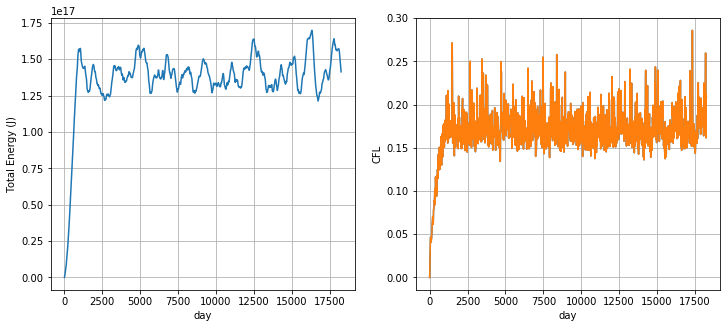

In [4]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(ds_stat1.Time/(1e9*3600*24), ds_stat1.En)
plt.xlabel('day')
plt.ylabel('Total Energy (J)')
plt.grid()

plt.subplot(1,2,2)
plt.plot(ds_stat1.Time/(1e9*3600*24), ds_stat1.max_CFL_lin)
plt.plot(ds_stat1.Time/(1e9*3600*24), ds_stat1.max_CFL_trans)
plt.xlabel('day')
plt.ylabel('CFL')
plt.grid()

In [7]:
ds1 = xr.open_dataset(ppdir+"H_1000_n_2/prog.nc")
print(ds1)

<xarray.Dataset>
Dimensions:   (Time: 1825, xh: 400, xq: 400, yh: 200, yq: 200, zl: 2)
Coordinates:
  * xq        (xq) float64 4.0 8.0 12.0 16.0 ... 1.592e+03 1.596e+03 1.6e+03
  * yh        (yh) float64 2.0 6.0 10.0 14.0 18.0 ... 786.0 790.0 794.0 798.0
  * zl        (zl) float64 1.027e+03 1.028e+03
  * Time      (Time) object 0001-01-11 00:00:00 ... 0050-12-20 00:00:00
  * xh        (xh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * yq        (yq) float64 4.0 8.0 12.0 16.0 20.0 ... 788.0 792.0 796.0 800.0
Data variables:
    u         (Time, zl, yh, xq) float32 ...
    v         (Time, zl, yq, xh) float32 ...
    h         (Time, zl, yh, xh) float64 ...
    taux_bot  (Time, yh, xq) float32 ...
    tauy_bot  (Time, yq, xh) float32 ...
Attributes:
    filename:          prog.nc
    title:             MOM Two-Layer Experiment
    associated_files:  area_t: ocean_month.nc
    grid_type:         regular
    grid_tile:         N/A


In [8]:
dsgrid = xr.open_dataset(ppdir+"H_1000_n_2/ocean_month.nc")
dsgrid

<xarray.Dataset>
Dimensions:      (Time: 1, xh: 400, xq: 400, yh: 200, yq: 200)
Coordinates:
  * xh           (xh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * yh           (yh) float64 2.0 6.0 10.0 14.0 18.0 ... 786.0 790.0 794.0 798.0
  * Time         (Time) object 0050-12-20 00:00:00
  * xq           (xq) float64 4.0 8.0 12.0 16.0 ... 1.592e+03 1.596e+03 1.6e+03
  * yq           (yq) float64 4.0 8.0 12.0 16.0 20.0 ... 788.0 792.0 796.0 800.0
Data variables:
    geolon       (yh, xh) float32 ...
    geolat       (yh, xh) float32 ...
    geolon_c     (yq, xq) float32 ...
    geolat_c     (yq, xq) float32 ...
    geolon_u     (yh, xq) float32 ...
    geolat_u     (yh, xq) float32 ...
    geolon_v     (yq, xh) float32 ...
    geolat_v     (yq, xh) float32 ...
    area_t       (yh, xh) float32 ...
    depth_ocean  (yh, xh) float32 ...
    wet          (yh, xh) float32 ...
    wet_c        (yq, xq) float32 ...
    wet_u        (yh, xq) float32 ...
    wet_v        (yq, x

In [9]:
ds1 = xr.merge([ds1, dsgrid])

In [10]:
ds1

<xarray.Dataset>
Dimensions:      (Time: 1825, xh: 400, xq: 400, yh: 200, yq: 200, zl: 2)
Coordinates:
  * Time         (Time) object 0001-01-11 00:00:00 ... 0050-12-20 00:00:00
  * xq           (xq) float64 4.0 8.0 12.0 16.0 ... 1.592e+03 1.596e+03 1.6e+03
  * yh           (yh) float64 2.0 6.0 10.0 14.0 18.0 ... 786.0 790.0 794.0 798.0
  * zl           (zl) float64 1.027e+03 1.028e+03
  * xh           (xh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * yq           (yq) float64 4.0 8.0 12.0 16.0 20.0 ... 788.0 792.0 796.0 800.0
Data variables:
    u            (Time, zl, yh, xq) float32 ...
    v            (Time, zl, yq, xh) float32 ...
    h            (Time, zl, yh, xh) float64 ...
    taux_bot     (Time, yh, xq) float32 ...
    tauy_bot     (Time, yq, xh) float32 ...
    geolon       (yh, xh) float32 ...
    geolat       (yh, xh) float32 ...
    geolon_c     (yq, xq) float32 ...
    geolat_c     (yq, xq) float32 ...
    geolon_u     (yh, xq) float32 ...
    geolat_

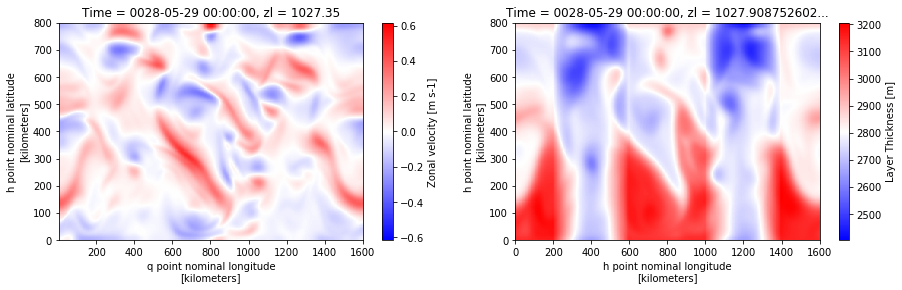

In [13]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
u1 = ds1.u.isel(Time = 1000, zl = 0)
u1.plot(cmap='bwr')

plt.subplot(1,2,2)
eta = ds1.h.isel(Time = 1000, zl = 1)
eta.plot(cmap='bwr')

In [14]:
g = 9.8
cd = 0.003
rho = ds_stat1.Layer.values
print(rho)

grid = Grid(ds1, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'} }, periodic=['X'])
grid

[1027.35      1027.9087526]


<xgcm.Grid>
X Axis (periodic):
  * center   xh --> right
  * right    xq --> center
Y Axis (not periodic):
  * center   yh --> right
  * right    yq --> center

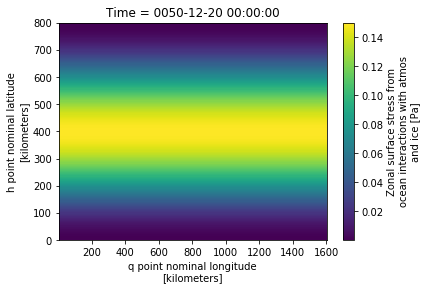

In [20]:
ds1.taux.isel(Time=1824).plot()

In [21]:
WS = ds1['taux'].isel(Time=1824).mean()/rho[0]

In [26]:
Topo_x = - grid.diff(ds1.depth_ocean, 'X', boundary='fill')/ ds1.dxCu
Topo_x = grid.interp(Topo_x, 'X', boundary='fill') # minus sign is required because D is depth

TFS = g * (Topo_x * ds1['h'].isel(Time = slice(500, 1825))).sum('zl')
TFS = TFS.mean('Time')

TFS1 = Topo_x * ds1['h'].isel(zl = 1, Time = slice(500, 1825))
TFS1 = TFS1.mean('Time') * g * (rho[1] - rho[0])/rho[0]

In [27]:
BD = ds1['taux_bot'].isel(Time = slice(500, 1825)).mean()/rho[0]

In [28]:
print(TFS.mean().values, TFS1.mean().values, WS.mean().values, BD.mean().values)

0.00019807360999261618 -0.00012626582882842223 7.300336105536793e-05 9.109855028882935e-07


In [29]:
TFS.mean().values + TFS1.mean().values

7.180778116419394e-05

In [32]:
# Mean Transport
h1 = grid.interp(ds1['h'], 'X', boundary='fill')
um = (ds1['u'] * h1).isel(Time = slice(500, 1825))
um = um.mean('Time')

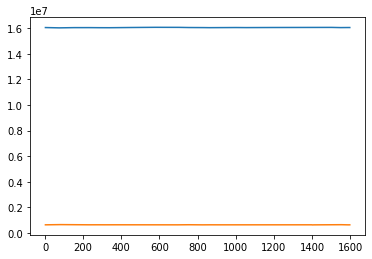

In [33]:
ux = um.sum('yh')*4000. 
plt.plot(ds1.xh, ux.transpose())

In [34]:
ds_stat1.close()
dsgrid.close()
ds1.close()